In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [4]:
dataset=load_iris()

In [6]:
x=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=pd.DataFrame(data=dataset.target,columns=["Target"])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [43]:
x=x[y["Target"].isin([0,1])]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [49]:
y=y[y["Target"].isin([0,1])]

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [53]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_proba=model.predict_proba(x_test)[:,1]

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
from sklearn.metrics import roc_auc_score,roc_curve
# Calculate the AUC score for the multiclass problem
auc_score = roc_auc_score(y_test, y_proba)  # You can use 'ovr' or 'ovo'
print("ROC-AUC Score:", auc_score)

ROC-AUC Score: 1.0


In [57]:
fpr,tpr,_=roc_curve(y_test,y_proba)

Text(0, 0.5, 'True positive rate')

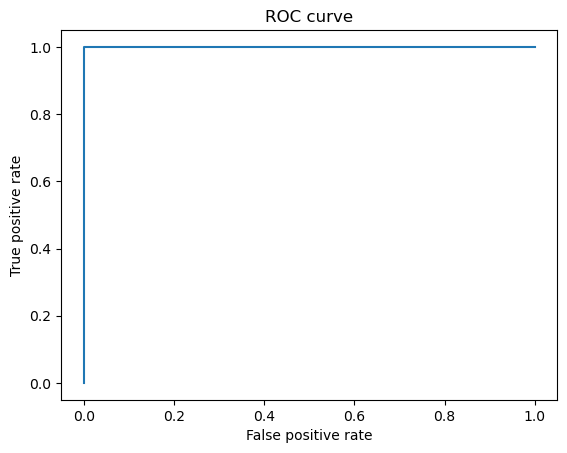

In [59]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")